<a href="https://colab.research.google.com/github/xesmaze/CPSC499-MDV-SR25/blob/main/NonlinearThermalTimeModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

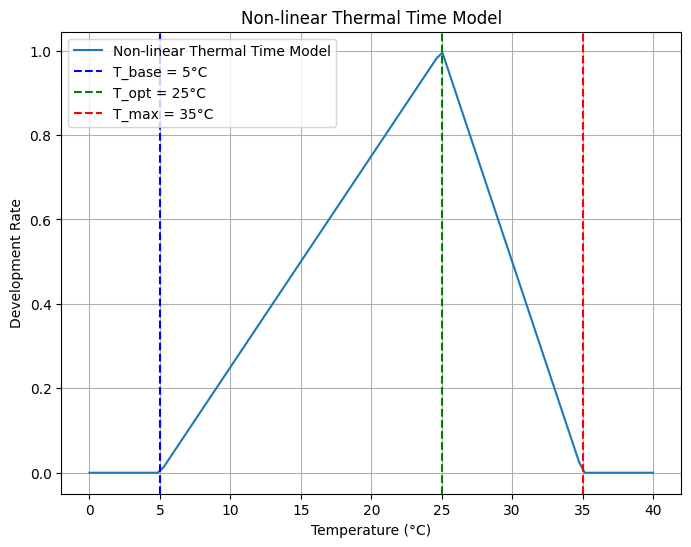

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Function to calculate development rate based on a non-linear thermal time model
def nonlinear_thermal_time(temp, T_base, T_opt, T_max):
    """
    Non-linear thermal time model for phenological development.

    Parameters:
    - temp: Temperature (°C)
    - T_base: Base temperature (°C) below which no development occurs.
    - T_opt: Optimal temperature (°C) for maximum development.
    - T_max: Maximum temperature (°C) above which development stops.

    Returns:
    - Development rate as a function of temperature.
    """
    if temp < T_base or temp > T_max:
        return 0
    elif temp <= T_opt:
        return (temp - T_base) / (T_opt - T_base)
    else:
        return (T_max - temp) / (T_max - T_opt)

# Parameters for the model
T_base = 5      # Base temperature (°C)
T_opt = 25      # Optimal temperature (°C)
T_max = 35      # Maximum temperature (°C)

# Generate a range of temperatures to evaluate the model
temperatures = np.linspace(0, 40, 100)  # Temperature range from 0°C to 40°C
development_rates = [nonlinear_thermal_time(temp, T_base, T_opt, T_max) for temp in temperatures]

# Plot the development rate curve
plt.figure(figsize=(8, 6))
plt.plot(temperatures, development_rates, label="Non-linear Thermal Time Model")
plt.axvline(T_base, color='blue', linestyle='--', label=f"T_base = {T_base}°C")
plt.axvline(T_opt, color='green', linestyle='--', label=f"T_opt = {T_opt}°C")
plt.axvline(T_max, color='red', linestyle='--', label=f"T_max = {T_max}°C")
plt.xlabel("Temperature (°C)")
plt.ylabel("Development Rate")
plt.title("Non-linear Thermal Time Model")
plt.legend()
plt.grid()
plt.show()


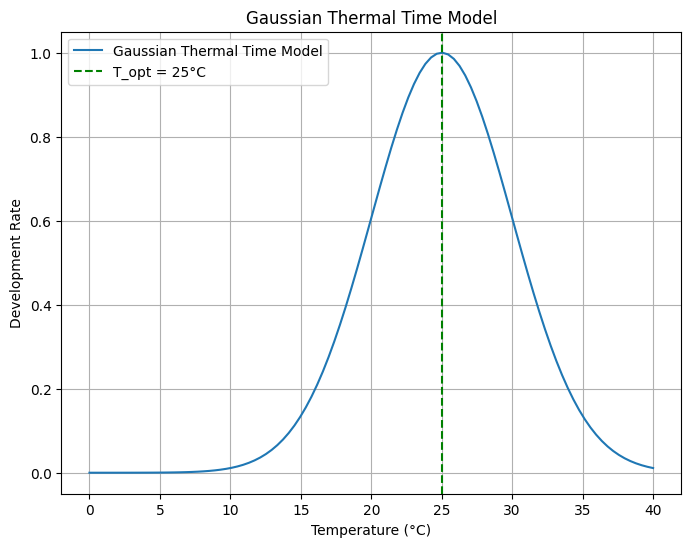

In [ ]:
## Gaussian function
import numpy as np
import matplotlib.pyplot as plt

def gaussian_thermal_time(temp, T_opt, sigma):
    """
    Gaussian thermal time model for phenology.

    Parameters:
    - temp: Temperature (°C)
    - T_opt: Optimal temperature (°C) for maximum development.
    - sigma: Spread (standard deviation) of the Gaussian curve.

    Returns:
    - Development rate as a function of temperature.
    """
    return np.exp(-((temp - T_opt)**2) / (2 * sigma**2))

# Parameters for the model
T_opt = 25  # Optimal temperature (°C)
sigma = 5   # Spread of the response (°C)

# Generate a range of temperatures to evaluate the model
temperatures = np.linspace(0, 40, 100)  # Temperature range from 0°C to 40°C
development_rates = gaussian_thermal_time(temperatures, T_opt, sigma)

# Plot the development rate curve
plt.figure(figsize=(8, 6))
plt.plot(temperatures, development_rates, label="Gaussian Thermal Time Model")
plt.axvline(T_opt, color='green', linestyle='--', label=f"T_opt = {T_opt}°C")
plt.xlabel("Temperature (°C)")
plt.ylabel("Development Rate")
plt.title("Gaussian Thermal Time Model")
plt.legend()
plt.grid()
plt.show()


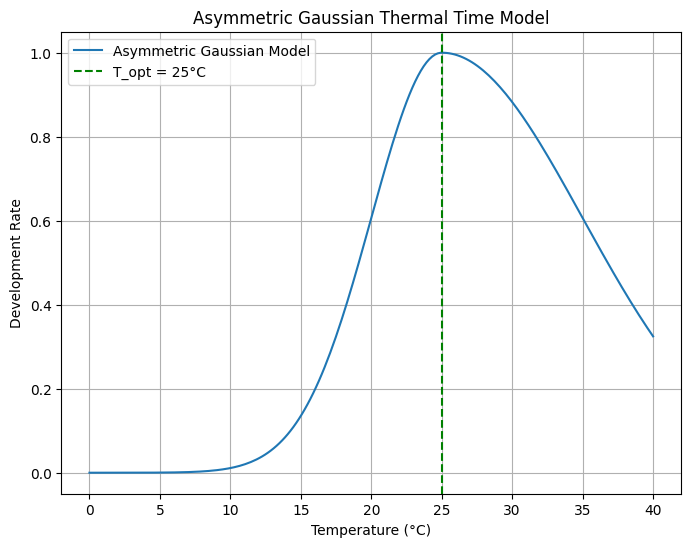

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def asymmetric_gaussian(temp, T_opt, sigma_low, sigma_high):
    """
    Asymmetric Gaussian thermal time model for phenology.

    Parameters:
    - temp: Temperature (°C) (can be a scalar or an array).
    - T_opt: Optimal temperature (°C) for maximum development rate.
    - sigma_low: Spread (standard deviation) of the curve for temperatures <= T_opt.
    - sigma_high: Spread (standard deviation) of the curve for temperatures > T_opt.

    Returns:
    - Development rate as a function of temperature.
    """
    # Initialize development rate
    rate = np.zeros_like(temp, dtype=float)

    # Calculate development rates for low and high temperature ranges
    rate[temp <= T_opt] = np.exp(-((temp[temp <= T_opt] - T_opt)**2) / (2 * sigma_low**2))
    rate[temp > T_opt] = np.exp(-((temp[temp > T_opt] - T_opt)**2) / (2 * sigma_high**2))

    return rate

# Parameters for the model
T_opt = 25       # Optimal temperature (°C)
sigma_low = 5    # Spread for temperatures <= T_opt
sigma_high = 10  # Spread for temperatures > T_opt

# Generate a range of temperatures to evaluate the model
temperatures = np.linspace(0, 40, 200)  # Temperature range from 0°C to 40°C
development_rates = asymmetric_gaussian(temperatures, T_opt, sigma_low, sigma_high)

# Plot the development rate curve
plt.figure(figsize=(8, 6))
plt.plot(temperatures, development_rates, label="Asymmetric Gaussian Model")
plt.axvline(T_opt, color='green', linestyle='--', label=f"T_opt = {T_opt}°C")
plt.xlabel("Temperature (°C)")
plt.ylabel("Development Rate")
plt.title("Asymmetric Gaussian Thermal Time Model")
plt.legend()
plt.grid()
plt.show()


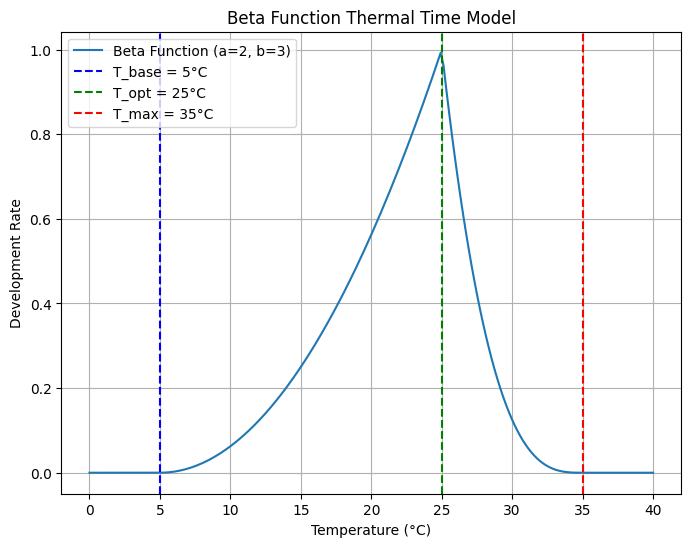

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def beta_function(temp, T_base, T_opt, T_max, a=1, b=1):
    """
    Beta function for modeling thermal time in phenology.

    Parameters:
    - temp: Temperature (°C) (can be a scalar or an array).
    - T_base: Base temperature (°C) below which no development occurs.
    - T_opt: Optimal temperature (°C) where development is maximal.
    - T_max: Maximum temperature (°C) above which no development occurs.
    - a: Shape parameter for the left side (T_base to T_opt).
    - b: Shape parameter for the right side (T_opt to T_max).

    Returns:
    - Development rate as a function of temperature.
    """
    # Initialize development rate
    rate = np.zeros_like(temp, dtype=float)

    # Beta function for T_base <= temp <= T_opt
    rate[(temp >= T_base) & (temp <= T_opt)] = (
        ((temp[(temp >= T_base) & (temp <= T_opt)] - T_base) / (T_opt - T_base)) ** a
    )

    # Beta function for T_opt < temp <= T_max
    rate[(temp > T_opt) & (temp <= T_max)] = (
        ((T_max - temp[(temp > T_opt) & (temp <= T_max)]) / (T_max - T_opt)) ** b
    )

    return rate

# Parameters for the model
T_base = 5       # Base temperature (°C)
T_opt = 25       # Optimal temperature (°C)
T_max = 35       # Maximum temperature (°C)
a = 2            # Shape parameter for the left side (steepness before T_opt)
b = 3            # Shape parameter for the right side (steepness after T_opt)

# Generate a range of temperatures to evaluate the model
temperatures = np.linspace(0, 40, 200)  # Temperature range from 0°C to 40°C
development_rates = beta_function(temperatures, T_base, T_opt, T_max, a, b)

# Plot the development rate curve
plt.figure(figsize=(8, 6))
plt.plot(temperatures, development_rates, label=f"Beta Function (a={a}, b={b})")
plt.axvline(T_base, color='blue', linestyle='--', label=f"T_base = {T_base}°C")
plt.axvline(T_opt, color='green', linestyle='--', label=f"T_opt = {T_opt}°C")
plt.axvline(T_max, color='red', linestyle='--', label=f"T_max = {T_max}°C")
plt.xlabel("Temperature (°C)")
plt.ylabel("Development Rate")
plt.title("Beta Function Thermal Time Model")
plt.legend()
plt.grid()
plt.show()


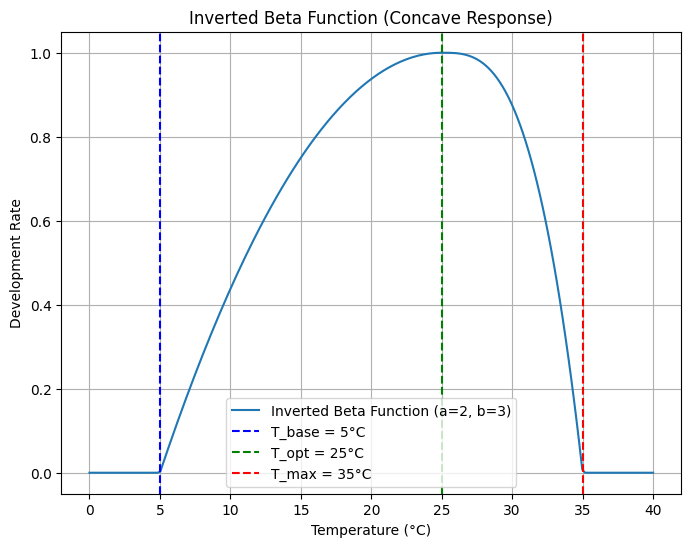

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def inverted_beta_function(temp, T_base, T_opt, T_max, a=1, b=1):
    """
    Inverted Beta function (concave) for modeling thermal time in phenology.

    Parameters:
    - temp: Temperature (°C) (can be a scalar or an array).
    - T_base: Base temperature (°C) below which no development occurs.
    - T_opt: Optimal temperature (°C) where development is maximal.
    - T_max: Maximum temperature (°C) above which no development occurs.
    - a: Shape parameter for the left side (T_base to T_opt).
    - b: Shape parameter for the right side (T_opt to T_max).

    Returns:
    - Development rate as a function of temperature (concave response).
    """
    # Initialize development rate
    rate = np.zeros_like(temp, dtype=float)

    # Inverted Beta function for T_base <= temp <= T_opt
    rate[(temp >= T_base) & (temp <= T_opt)] = 1 - (
        (1 - (temp[(temp >= T_base) & (temp <= T_opt)] - T_base) / (T_opt - T_base)) ** a
    )

    # Inverted Beta function for T_opt < temp <= T_max
    rate[(temp > T_opt) & (temp <= T_max)] = 1 - (
        (1 - (T_max - temp[(temp > T_opt) & (temp <= T_max)]) / (T_max - T_opt)) ** b
    )

    return rate

# Parameters for the model
T_base = 5       # Base temperature (°C)
T_opt = 25       # Optimal temperature (°C)
T_max = 35       # Maximum temperature (°C)
a = 2            # Shape parameter for the left side (steepness before T_opt)
b = 3            # Shape parameter for the right side (steepness after T_opt)

# Generate a range of temperatures to evaluate the model
temperatures = np.linspace(0, 40, 200)  # Temperature range from 0°C to 40°C
development_rates = inverted_beta_function(temperatures, T_base, T_opt, T_max, a, b)

# Plot the development rate curve
plt.figure(figsize=(8, 6))
plt.plot(temperatures, development_rates, label=f"Inverted Beta Function (a={a}, b={b})")
plt.axvline(T_base, color='blue', linestyle='--', label=f"T_base = {T_base}°C")
plt.axvline(T_opt, color='green', linestyle='--', label=f"T_opt = {T_opt}°C")
plt.axvline(T_max, color='red', linestyle='--', label=f"T_max = {T_max}°C")
plt.xlabel("Temperature (°C)")
plt.ylabel("Development Rate")
plt.title("Inverted Beta Function (Concave Response)")
plt.legend()
plt.grid()
plt.show()


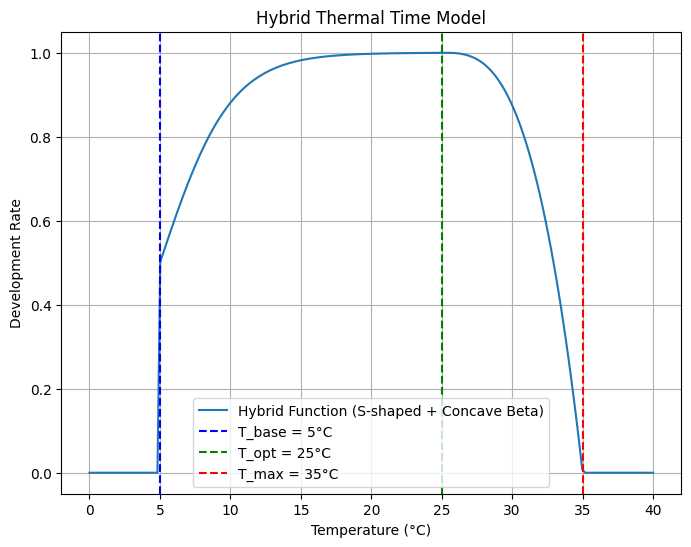

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def hybrid_function(temp, T_base, T_opt, T_max, k=1, sigma_low=1, b=1):
    """
    Hybrid function: S-shaped (sigmoid) for the first part and concave beta for the second part.

    Parameters:
    - temp: Temperature (°C) (can be a scalar or an array).
    - T_base: Base temperature (°C) below which no development occurs.
    - T_opt: Optimal temperature (°C) where development is maximal.
    - T_max: Maximum temperature (°C) above which no development occurs.
    - k: Steepness parameter for the S-shaped (sigmoid) curve.
    - sigma_low: Spread parameter for the S-shaped curve.
    - b: Shape parameter for the concave beta function.

    Returns:
    - Development rate as a function of temperature.
    """
    # Initialize development rate
    rate = np.zeros_like(temp, dtype=float)

    # S-shaped (sigmoid) curve for T_base <= temp <= T_opt
    rate[(temp >= T_base) & (temp <= T_opt)] = 1 / (
        1 + np.exp(-k * ((temp[(temp >= T_base) & (temp <= T_opt)] - T_base) / sigma_low))
    )

    # Concave beta function for T_opt < temp <= T_max
    rate[(temp > T_opt) & (temp <= T_max)] = 1 - (
        (1 - (T_max - temp[(temp > T_opt) & (temp <= T_max)]) / (T_max - T_opt)) ** b
    )

    return rate

# Parameters for the model
T_base = 5       # Base temperature (°C)
T_opt = 25       # Optimal temperature (°C)
T_max = 35       # Maximum temperature (°C)
k = 2            # Steepness of the sigmoid curve
sigma_low = 5    # Spread for the sigmoid curve
b = 3            # Shape parameter for the concave beta function

# Generate a range of temperatures to evaluate the model
temperatures = np.linspace(0, 40, 200)  # Temperature range from 0°C to 40°C
development_rates = hybrid_function(temperatures, T_base, T_opt, T_max, k, sigma_low, b)

# Plot the development rate curve
plt.figure(figsize=(8, 6))
plt.plot(temperatures, development_rates, label="Hybrid Function (S-shaped + Concave Beta)")
plt.axvline(T_base, color='blue', linestyle='--', label=f"T_base = {T_base}°C")
plt.axvline(T_opt, color='green', linestyle='--', label=f"T_opt = {T_opt}°C")
plt.axvline(T_max, color='red', linestyle='--', label=f"T_max = {T_max}°C")
plt.xlabel("Temperature (°C)")
plt.ylabel("Development Rate")
plt.title("Hybrid Thermal Time Model")
plt.legend()
plt.grid()
plt.show()
